# 配置基础环境

In [2]:
import akshare as ak
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'STKAITI'
plt.rcParams['axes.unicode_minus'] = False
# 关闭警告信息
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 获取上证指数数据
index_code = 'sh000001'
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2024-12-31')
price_df = ak.stock_zh_index_daily(symbol=index_code)
price_df['date'] = pd.to_datetime(price_df['date'])
price_df = price_df[(price_df['date'] >= start_date) & (price_df['date'] <= end_date)]
price_df = price_df.sort_values('date').set_index('date')

In [7]:
# 计算每日收益率
price_df['returns'] = price_df['close'].pct_change(periods=1).shift(-1).fillna(0)
# 计算未来 10 日涨跌幅
price_df['returns_10'] = price_df['close'].pct_change(periods=10).shift(-1).fillna(0)
price_df

,open,high,low,close,volume,returns,returns_10
date,,,,,,,
2014-01-02,2112.126,2113.110,2101.016,2109.387,6848548800,-0.012445,0.000000
2014-01-03,2101.542,2102.167,2075.899,2083.136,8449724000,-0.017967,0.000000
2014-01-06,2078.684,2078.684,2034.006,2045.709,8958760800,0.000786,0.000000
2014-01-07,2034.224,2052.279,2029.246,2047.317,6340293600,-0.001454,0.000000
2014-01-08,2047.256,2062.952,2037.110,2044.340,7164736000,-0.008178,0.000000
...,...,...,...,...,...,...,...
2024-06-04,3071.320,3095.322,3063.588,3091.199,30928759800,-0.008345,-0.029487
2024-06-05,3086.051,3092.346,3064.736,3065.403,29054234400,-0.005418,-0.021690
2024-06-06,3069.439,3077.673,3040.830,3048.794,36986710400,0.000815,-0.012170


# 量在价先

In [19]:
days = 20
# 单均线
price_df[f'ma_{days}'] = ta.sma(price_df['close'], length=days)
# 成交量时序排名
price_df[f'volume_rank_{days}'] = price_df[f'ma_{days}'].rolling(window=days).rank(method='average') / days
price_df[f'volume_rank_{days}'] = 2 * price_df[f'volume_rank_{days}'] - 1
# rsrs
price_df['std_high'] = price_df['high'].rolling(window=days).std()
price_df['std_low'] = price_df['low'].rolling(window=days).std()
price_df['corr_high_low'] = price_df['high'].rolling(window=days).corr(price_df['low'])
price_df['rsrs'] = price_df['std_high'] / price_df['std_low'] * price_df['corr_high_low']
price_df = price_df.dropna()
price_df

,open,high,low,close,volume,returns,returns_10,ma_20,volume_rank_20,std_high,std_low,corr_high_low,rsrs
date,,,,,,,,,,,,,
2014-04-28,2033.337,2035.990,2000.137,2003.487,8979526400,0.008412,-0.038666,2077.43115,0.4,32.698899,33.579943,0.949865,0.924943
2014-04-29,2001.896,2021.680,1997.640,2020.341,7622127200,0.002978,-0.037415,2076.78290,0.3,34.930731,35.705978,0.955798,0.935046
2014-04-30,2020.438,2029.538,2016.577,2026.358,7452857600,0.000491,-0.034081,2075.72780,0.2,36.422031,36.384511,0.955317,0.956302
2014-05-05,2022.178,2028.957,2007.351,2027.353,7993339200,0.000338,-0.033231,2074.14605,0.1,38.292823,38.292309,0.961620,0.961633
2014-05-06,2024.256,2038.705,2021.485,2028.038,7460940800,-0.008853,-0.026983,2073.36285,-0.1,39.503130,38.956917,0.962671,0.976169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,3071.320,3095.322,3063.588,3091.199,30928759800,-0.008345,-0.029487,3125.65960,0.4,23.026863,27.439999,0.959834,0.805465
2024-06-05,3086.051,3092.346,3064.736,3065.403,29054234400,-0.005418,-0.021690,3122.50575,0.2,25.361577,29.251455,0.965676,0.837259
2024-06-06,3069.439,3077.673,3040.830,3048.794,36986710400,0.000815,-0.012170,3117.22945,-0.1,28.165746,32.682882,0.973157,0.838656


In [20]:
tm = 0.05
sf = 0.8
sr = 0.2
sc = 0.5
# 计算择时信号
ratio = 0.1
timing_df = pd.DataFrame()
# vbp
# timing_df['vbp'] = (price_df['returns_10'] >= tm) * (price_df['volume_rank_20'] >= sr) * 1. + \
#     (price_df['returns_10'] >= tm) * (price_df['volume_rank_20'] < sr) * -1. + \
#     (price_df['returns_10'] < -tm) * (price_df['volume_rank_20'] >= sf) * 1. + \
#     (price_df['returns_10'] < -tm) * (price_df['volume_rank_20'] < sf) * -1. + \
#     ((price_df['returns_10'] >= -tm) & (price_df['returns_10'] < tm)) * (price_df['volume_rank_20'] >= sc) * 1. + \
#     ((price_df['returns_10'] >= -tm) & (price_df['returns_10'] < tm)) * (price_df['volume_rank_20'] < sc) * -1.
timing_df['vbp'] = (price_df['returns_10'] >= tm) * (price_df['rsrs'] >= 0.9+ratio) * 1. + \
    (price_df['returns_10'] >= tm) * (price_df['rsrs'] <= 0.9-ratio) * -1. + \
    (price_df['returns_10'] < -tm) * ((price_df['volume_rank_20'] >= sf) & (price_df['rsrs'] >= 0.9+ratio)) * 1. + \
    (price_df['returns_10'] < -tm) * ((price_df['volume_rank_20'] < sf) | (price_df['rsrs'] <= 0.9-ratio)) * -1. + \
    ((price_df['returns_10'] >= -tm) & (price_df['returns_10'] < tm)) * ((price_df['volume_rank_20'] >= sc) | (price_df['rsrs'] >= 0.9+ratio)) * 1. + \
    ((price_df['returns_10'] >= -tm) & (price_df['returns_10'] < tm)) * ((price_df['volume_rank_20'] < sc) & (price_df['rsrs'] <= 0.9-ratio)) * -1.
timing_df['vbp'] = timing_df['vbp'].replace(0, np.nan)
timing_df['vbp'] = timing_df['vbp'].fillna(method='ffill').fillna(0)
timing_df['vbp'][timing_df['vbp'] < 0] = 0
# rsrs
timing_df['rsrs'] = (price_df['rsrs'] >= 0.9+ratio) * 1. + (price_df['rsrs'] <= 0.9-ratio) * -1.
timing_df['rsrs'] = timing_df['rsrs'].replace(0, np.nan)
timing_df['rsrs'] = timing_df['rsrs'].fillna(method='ffill').fillna(0)
timing_df['rsrs'][timing_df['rsrs'] < 0] = 0
# ma
timing_df[f'ma_{days}'] = (price_df[[f'ma_{days}']].diff() > 0) * 1.
timing_df['不择时'] = 1.
timing_df

,vbp,rsrs,ma_20,不择时
date,,,,
2014-04-28,0.0,0.0,0.0,1.0
2014-04-29,0.0,0.0,0.0,1.0
2014-04-30,0.0,0.0,0.0,1.0
2014-05-05,0.0,0.0,0.0,1.0
2014-05-06,0.0,0.0,0.0,1.0
...,...,...,...,...
2024-06-04,1.0,0.0,0.0,1.0
2024-06-05,1.0,0.0,0.0,1.0
2024-06-06,1.0,0.0,0.0,1.0


In [25]:
# 计算每日收益率
timing_ret = timing_df.mul(price_df['returns'], axis=0)
timing_ret['超额收益'] = (1 + timing_ret['vbp']).div(1 + timing_ret['不择时'], axis=0) - 1.
cumul_ret = (1 + timing_ret.fillna(0)).cumprod() - 1.
cumul_ret

,vbp,rsrs,ma_20,不择时,超额收益
date,,,,,
2014-04-28,0.000000,0.000000,0.000000,0.008412,-0.008342
2014-04-29,0.000000,0.000000,0.000000,0.011416,-0.011287
2014-04-30,0.000000,0.000000,0.000000,0.011912,-0.011772
2014-05-05,0.000000,0.000000,0.000000,0.012254,-0.012106
2014-05-06,0.000000,0.000000,0.000000,0.003292,-0.003281
...,...,...,...,...,...
2024-06-04,1.889671,1.423766,1.295763,0.530034,0.584126
2024-06-05,1.874015,1.423766,1.295763,0.521744,0.592756
2024-06-06,1.876357,1.423766,1.295763,0.522984,0.591458


<Axes: title={'center': 'VBP择时'}, xlabel='date'>

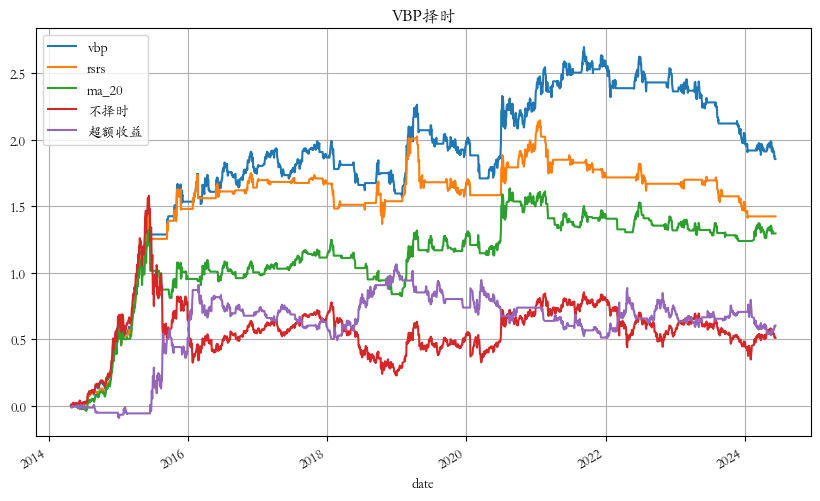

In [26]:
# 可视化输出
cumul_ret.plot(figsize=(10, 6), title='VBP择时', grid=True)